# Data Analysis Project

# _EDA on Data Science job salaries_

## The Data

This project studies a full dataset of global AI (Artificial Intelligence), ML (Machine Learning), and Data Science jobs salaries. Data has been sourced from aijobs.net and contains anonymous salary information from professionals worldwide in the AI, ML, and Data Science space. 
The data is structed in a single table in CSV format that contains following columns:
*	work_year : The year of salary was paid
*	experience_level : The experience level in the job during the year
*	employment_type: The type of employment for the role
*	job_title: The role worked in during the year.
*	salary: The total gross salary amount paid.
*	salary_currency: The currency of the salary paid as an ISO 4217 currency code.
*	salary_in_usd: The salary in USD
*	employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
*	remote_ratio: The overall amount of work done remotely
*	company_location: The country of the employer's main office or contracting branch
*	company_size: The median number of people that worked for the company during the year

Provided a wealth of information on salary trends in the AI, ML, and Data Science space. The data is being updated regularly with new data and usually on a weekly basis. However, due to the whole dataset has been made publicly available under CC0 license it is essential that to ensure that the data is accurate and reliable the dataset will be reviewed and explored in this following project.

## Project Aim

The aim of this project is to analyze the global salaries of the AI, ML, and Data Science jobs to identify any significant trends in the job market. With the increasing demand for these roles, it is essential to understand how their salaries vary across different countries, industries, and experience levels. Exploring the features in the dataset to gain insights into the data science job market and salaries around the world which will be useful for anyone interested in making a career in this field and employers in these field.

### Architecture

The system design for this project would involve a pipeline architecture with data going through several stages of transformation and analysis. The pipeline would begin with data cleaning and preprocessing to remove missing values, outliers, and any duplicates. For the case in this dataset, it is hard to define the outliers or any duplicates as there might be different employer which have exactly same attribute so in this case won’t dropping and duplicates and outliers for analysis. Following that, the data would be split into two categories: categorical and numeric columns. The categorical columns would be analyzed using univariate analysis to gain insights into the different features such as experience level, job titles, employment type, employee residence, company location, and company size. The numeric columns would be used to conduct work year analysis, experience level analysis, and salary analysis. Finally, the data would be visualized using graphs and charts to provide insights into the data science job market.

# Program Code 

### 1. Import Necessary Libraries
Libraries are category as following : 
* Data : pandas, country_converter
* Visualization: matplotlib, seaborn, plotly

In [2]:
#install 
# !pip install country_converter
# !pip install plotly

# data
import pandas as pd
import country_converter as coco

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
# read dataframe
df = pd.read_csv('salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,39000,EUR,42107,DE,50,DE,M
1,2023,MI,FT,Machine Learning Engineer,300000,USD,300000,US,0,US,M
2,2023,MI,FT,Machine Learning Engineer,200000,USD,200000,US,0,US,M
3,2023,SE,FT,Data Architect,155000,USD,155000,US,100,US,M
4,2023,SE,FT,Data Architect,135000,USD,135000,US,100,US,M


In [4]:
df.shape

(7289, 11)

In [5]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Code above to check if there is any missing value and clearly there's on mising value on the datasets.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           7289 non-null   int64 
 1   experience_level    7289 non-null   object
 2   employment_type     7289 non-null   object
 3   job_title           7289 non-null   object
 4   salary              7289 non-null   int64 
 5   salary_currency     7289 non-null   object
 6   salary_in_usd       7289 non-null   int64 
 7   employee_residence  7289 non-null   object
 8   remote_ratio        7289 non-null   int64 
 9   company_location    7289 non-null   object
 10  company_size        7289 non-null   object
dtypes: int64(4), object(7)
memory usage: 626.5+ KB


### 2. Explore each feature in the dataset
As mentioned above the data would be split into two categories: _categorical_ and _numeric_ columns

#### 2.1 Categorical Columns
Catergorical columns in the dataset including : 
* Experiece Level
* Employment Type 
* Job Titles
* Employee Resdience
* Company Location
* Company Size.

##### 2.1.1 Experience Level

In [7]:
df['experience_level'].unique()

array(['MI', 'SE', 'EX', 'EN'], dtype=object)

There's 4 categorical values in column 'experience_level' and each are:
* EN = Entry-Level / Junior 
* MI = Mid-Level / Intermediate 
* SE = Senior-Level/ Expert
* EX = Executive-Level / Director

To better understanding in following analysis we can replace each value to each refers name 

In [8]:
ex_level = df['experience_level'].value_counts()
label= ex_level.index.tolist()
fig = px.pie(ex_level, names = ex_level.index, values = ex_level.values, 
                title = '2.1.1. Experience Level',
                color=ex_level.index,
                color_discrete_sequence=px.colors.sequential.RdBu)

fig.data[0].update({'textinfo' : 'label+percent'})
fig.update_layout(font = dict(size = 15),title_font_color="black",)
fig.show()


From the pie chart above, can clearly show that Senior-level/ Expert accounts for __67.4%__ and follow by Mid-level/Interdiate with __21.3%__.

##### 2.1.2 Employment Type


In [9]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

There's 4 categorical values in column 'employment_type' and each are:
* FT = Full Time
* CT = Contract
* FL = Freelance
* PT = Part-Time


In [10]:
type_grouped = df['employment_type'].value_counts()
fig = px.bar(x = type_grouped.index, y = type_grouped.values, 
       color = type_grouped.index, 
       color_discrete_sequence=px.colors.sequential.RdBu,
       text = type_grouped.values, title = '2.1.2. Employment Type Distribution')

fig.update_layout(
    xaxis_title="Employment Type",
    yaxis_title="count")

fig.update_traces(width=0.5)
fig.update_layout(font = dict(size = 15),title_font_color="black",)
fig.show()

From the bar chart can show that most of the employee types are full-time worker

##### 2.1.3 Job Titles
By exploring the job titles from the dataset, it can understand there are how many job titles in this field worldwide and which are the on demand trend of job titles in this field

In [11]:
df['job_title'].value_counts().size

119

A bar chart will be provided to easier understand top 10 most popular job titles in this field show below:

In [12]:
top10_jobs = df['job_title'].value_counts().nlargest(10)
top10_jobs

Data Engineer                1746
Data Scientist               1535
Data Analyst                 1100
Machine Learning Engineer     736
Applied Scientist             208
Analytics Engineer            202
Research Scientist            193
Data Architect                159
Research Engineer             109
Data Manager                  108
Name: job_title, dtype: int64

In [13]:
fig = px.bar(x=top10_jobs.values, 
             y=top10_jobs.index, 
             color = top10_jobs.index,
             color_discrete_sequence=px.colors.sequential.RdBu,
             text=top10_jobs.values,
             title= '2.1.3. Top 10 Job Titles'
             )
fig.update_layout(xaxis_title="Count",
                  yaxis_title="Job titles",yaxis={'categoryorder':'total ascending'})
fig.update_layout(font = dict(size = 15),title_font_color="black",)
fig.show()

Data Engineer, Data Scientist, and Data Analyst having the top 3 most frequent job titles along 2020-2023.

##### 2.1.4 Employee Residence and Company Location
In this section the employee residence and company location will be explore by plotting map and bar charts 

First have to convert the country code of the dataset for choropleth readable type:

In [14]:
converted_residence = coco.convert(names=df['employee_residence'], to="ISO3")
converted_company = coco.convert(names=df['company_location'], to="ISO3")
df['employee_residence'] = converted_residence
df['company_location'] = converted_company


In [15]:
residence = df['employee_residence'].value_counts()
company = df['company_location'].value_counts()
fig1 = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.OrRd,
                    title = '2.1.4.1 Employee Residence Loaction Distribution Map')
fig2 = px.choropleth(locations=company.index,
                    color=company.values,
                    color_continuous_scale=px.colors.sequential.OrRd,
                    title = '2.1.4.2 Company Loaction Distribution Map')


fig1.update_layout(font = dict(size = 15),title_font_color="black",)
fig2.update_layout(font = dict(size = 15),title_font_color="black",)
fig1.show()
fig2.show()

In [16]:
employee_location = residence[:10]
fig = px.bar(y=employee_location.values, 
             x=employee_location.index, 
             color = employee_location.index,
             color_discrete_sequence=px.colors.sequential.RdBu,
             text=employee_location.values,
             title= '2.1.4.3 Top 10 Location of Employee',
             )
fig.update_layout(
    xaxis_title="Location of Employee",
    yaxis_title="count")
fig.update_layout(font = dict(size = 15),title_font_color="black",)
fig.show()

From the distribution map and the bar chart can clearly show that most of the employee are from the USA follow by GBR and CAN.

##### 2.1.5 Company Location and Company size

In this section will explore the company location and size 

In [17]:
grouped_size = df['company_size'].value_counts()


fig = px.pie(grouped_size, names = grouped_size.index, values = grouped_size.values, 
                title = '2.1.5. Distribution of Company Size',
                color=grouped_size.index,
                color_discrete_sequence=px.colors.sequential.RdBu)

# fig.update_traces(width=0.5)
fig.update_layout(
    xaxis_title="Company Size",
    yaxis_title="count")
fig.data[0].update({'textinfo' : 'label+percent'})
fig.update_layout(font = dict(size = 15),title_font_color="black",)
fig.show()

__84.6%__ of the company size among the data is medium size which occupy the majority of the company size

#### 2.2 Numeric Columns
Numeric columns in the dataset including : 
* Work Year
* Salary_in_usd
* Remote ratio


##### 2.2.1 Work Year
Work year not only show the year of salary was paid also showing the total amount of jobs work in each year

In [18]:
# plot a bar chart how many data in each year
fig = px.bar( x = df['work_year'].value_counts().index,
              y = df['work_year'].value_counts().values,
              color = df['work_year'].value_counts().values,
              color_continuous_scale=px.colors.sequential.OrRd,
              text = df['work_year'].value_counts().values,
              title = '2.2.1 Total Jobs in Each Year')

fig.update_layout(xaxis_title="Year",
                  yaxis_title="Count",
                  showlegend=False)
fig.update_xaxes(type='category')
fig.update_layout(font = dict(size = 15),title_font_color="black",)
fig.show()

    

From the bar chart can be easily show that the demand on data science related job raise a lot.

##### 2.2.2 Salary in USD
Ploting the distribution of salary in each year

In [19]:
# Plot the distribution of salary in each year
fig = px.box(df, 
             x="work_year", 
             y="salary_in_usd", 
             color="work_year",
             color_discrete_sequence=px.colors.qualitative.Set1,
             title = '2.2.2 Salary in USD (BoxPlot)')
fig.update_layout(font = dict(size = 15),title_font_color="black",)
fig.show()

The salary for 2022-2023 mostly distributed between 130k to 145k however for 2020-2021 only around 72k to 80k which are a huge increase from 2020-2021 to 2022-2023.

##### 2.2.3 Remote Ratio
The remote ratio consists of 3 values of 100, 50 and 0 can be understand as : 
* 100 = Fully remote
* 50 = Partially remote 
* 0 = Not remote


In [20]:
# Categorize remote_ratio
def categorize_remote_ratio(ratio):
    if ratio == 100:
        return 'Fully Remote'
    elif ratio > 0:
        return 'Partially Remote'
    else:
        return 'Not Remote'
salaries =df.copy()
salaries['remote_category'] = df['remote_ratio'].apply(categorize_remote_ratio)

# Group by work_year and remote_category to get counts
remote_counts = salaries.groupby(['work_year', 'remote_category']).size().unstack().reset_index()

# Plotting
fig_remote = px.bar(remote_counts, 
                    x='work_year', 
                    y=['Fully Remote', 'Partially Remote', 'Not Remote'],
                    title='2.2.3 Distribution of Remote Jobs by Year')
fig_remote.update_layout(font=dict(size=15), title_font_color="black", barmode='group')
fig_remote.show()


Remote work peaked during 2020-2022 and that could be attributed to the pandemic. With time, no remote work policy has been applied again as it is the case for 2023.

## Salary Distribution by Experience Level

In [21]:
# Plotting the box plot for salary distribution against experience_level
fig_salary_exp = px.box(df, 
                        x='experience_level', 
                        y='salary_in_usd', 
                        title='Salary Distribution by Experience Level',
                        category_orders={"experience_level": ["EN", "MI", "SE", "EX"]})  # Assuming these levels

fig_salary_exp.update_layout(font=dict(size=15), title_font_color="black")
fig_salary_exp.show()

As the experience level increases, the median salary also tends to increase. Outliers are present in all experience levels, especially on the higher end of the salary range. These outliers could be due to various factors such as the specific role, industry, location, or other benefits offered by the company.

Investigate the outlier from 'MI" if is a outlier or not. As different country might have different salary range so it is hard to define the outlier in this case. Filter out the row and see where the company at.

In [22]:
# Filter the dataset based on the given conditions
filtered_rows = df[
    (df['experience_level'] == 'MI') & 
    (df['salary_in_usd'].isin([450000, 430967, 426993, 423000]))
]

filtered_rows


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5583,2022,MI,FT,Data Analyst,350000,GBP,430967,GBR,0,GBR,M
7071,2020,MI,FT,Research Scientist,450000,USD,450000,USA,0,USA,M
7281,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,USA,50,USA,L


Experience level is a significant factor in determining salary. As one gains more experience, not only does the median salary increase, but the range of potential salaries also expands. This trend emphasizes the value of experience in the job market.

## What Job Title get highest salary?

In [23]:
# Get the top 10 most frequent job titles
top_10_frequent_jobs = df['job_title'].value_counts().head(10).index.tolist()

# Filter the dataframe to include only these top 10 job titles
filtered_df = df[df['job_title'].isin(top_10_frequent_jobs)]

# Order the top 10 most frequent job titles by median salary in descending order
ordered_top_10_by_salary_reload = filtered_df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).index.tolist()
# Plotting the box plot for salary distribution against these top 10 job titles
fig_top_10_frequent = px.box(filtered_df, 
                             x='job_title', 
                             y='salary_in_usd', 
                             title='Salary Distribution for Top 10 Most Frequent Job Titles',
                             category_orders={"job_title": ordered_top_10_by_salary_reload})

fig_top_10_frequent.update_layout(font=dict(size=15), title_font_color="black", xaxis_tickangle=-45, height=700)
fig_top_10_frequent.show()


## Is there any relationship between salary and remote working?

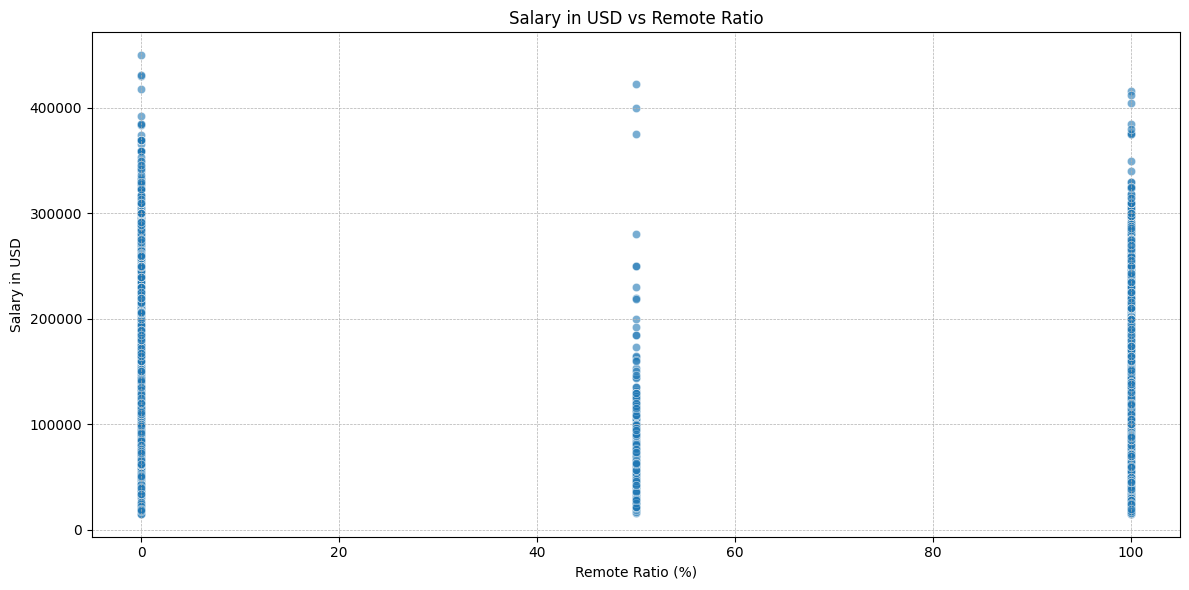

In [24]:

# Set up the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['remote_ratio'], y=df['salary_in_usd'], alpha=0.6)

# Title and labels
plt.title('Salary in USD vs Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary in USD')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


* There's a wide range of salaries across all remote ratios.
* Many data points are clustered at 0% and 100% remote ratios, indicating that many positions are either fully on-site or fully remote.
* There doesn't appear to be a clear linear trend between the remote ratio and salary. The salaries seem to be distributed across all ranges of the remote ratio.

## Salary distribution by company location

In [25]:
# Compute basic statistics for salary_in_usd based on company_location
salary_location_stats = df.groupby('company_location')['salary_in_usd'].describe()

sorted_locations = salary_location_stats.sort_values(by='50%', ascending=False).index
sorted_locations

Index(['QAT', 'PRI', 'USA', 'SAU', 'CAN', 'NZL', 'BIH', 'ISR', 'ARE', 'CHE',
       'IRL', 'IRN', 'IRQ', 'DZA', 'CHN', 'LTU', 'GBR', 'NOR', 'SWE', 'NLD',
       'AUS', 'BEL', 'JPN', 'DEU', 'HRV', 'MEX', 'CZE', 'COL', 'AUT', 'FIN',
       'SGP', 'HKG', 'KEN', 'FRA', 'SVN', 'LUX', 'UKR', 'ARG', 'LVA', 'RUS',
       'ROU', 'BRA', 'ITA', 'GRC', 'AND', 'NGA', 'ARM', 'CAF', 'EST', 'ESP',
       'KOR', 'DNK', 'BHS', 'POL', 'PRT', 'CHL', 'MYS', 'ZAF', 'IDN', 'ASM',
       'PHL', 'PAK', 'GHA', 'IND', 'MLT', 'HUN', 'THA', 'EGY', 'TUR', 'HND',
       'MDA', 'ECU'],
      dtype='object', name='company_location')

In [26]:
# Set up the box plot for salary distribution based on average salary of the top 10 locations
fig = px.box(df, 
             x='company_location', 
             y='salary_in_usd', 
             title='Salary Distribution order by the median salary of the company locations',
             category_orders={"company_location": sorted_locations})  # Assuming these level
fig.update_layout(font=dict(size=15), title_font_color="black", xaxis_tickangle=-45, height=700)

fig.show()

From the box plot, we can observe the following:

* Wide Variation: There is a wide variation in salary distributions across different company locations. Some countries have a tighter salary range, while others have a broader distribution.

* Outliers: Several company locations exhibit outliers. These are data points that fall significantly outside the interquartile range. For example, locations like 'USA', 'RUS', 'GBR', 'FRA','NGA' and 'ESP' (among others) have noticeable high salary outliers.

* US Distribution: The US, which has the most significant number of data points, has a wide distribution of salaries. The median salary in the US seems to be higher than many other locations.

* Some Locations with Few Data Points: Many company locations have very few data points, which makes it challenging to draw meaningful conclusions for those locations.

In [27]:
salary_location = df.groupby(['salary_in_usd','company_location']).size().reset_index()
meidan_salary = salary_location.groupby('company_location').median().reset_index()

fig = px.choropleth(locations=meidan_salary['company_location'],
                    color=meidan_salary['salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.Aggrnyl,
                    title = 'Median Salary by Company Location')

fig.update_layout(font = dict(size = 15),title_font_color="black",)

fig.show()

## Salary Distribution by Company Size

In [28]:
# Set up the box plot for salary distribution based on company size
fig = px.box(df, 
             x='company_size', 
             y='salary_in_usd', 
             title='Salary Distribution by Company Size',
             category_orders={"company_size": ['S', 'M', 'L']})  # Assuming these level
fig.update_layout(font=dict(size=15), title_font_color="black", xaxis_tickangle=-45, height=700)

fig.show()



* Small Companies (S): These companies generally have a wider spread of salaries, with a lower median compared to medium and large companies. There are some high salary outliers within this category.

* Medium Companies (M): The median salary for medium-sized companies is higher than both small companies and large companies. The salary range is broad, and there are noticeable outliers on the higher end.

* Large Companies (L): Large companies is higher than small companies but lower than medium Companies. There's a considerable spread in salaries.

## Growth in the Data Science Job Market

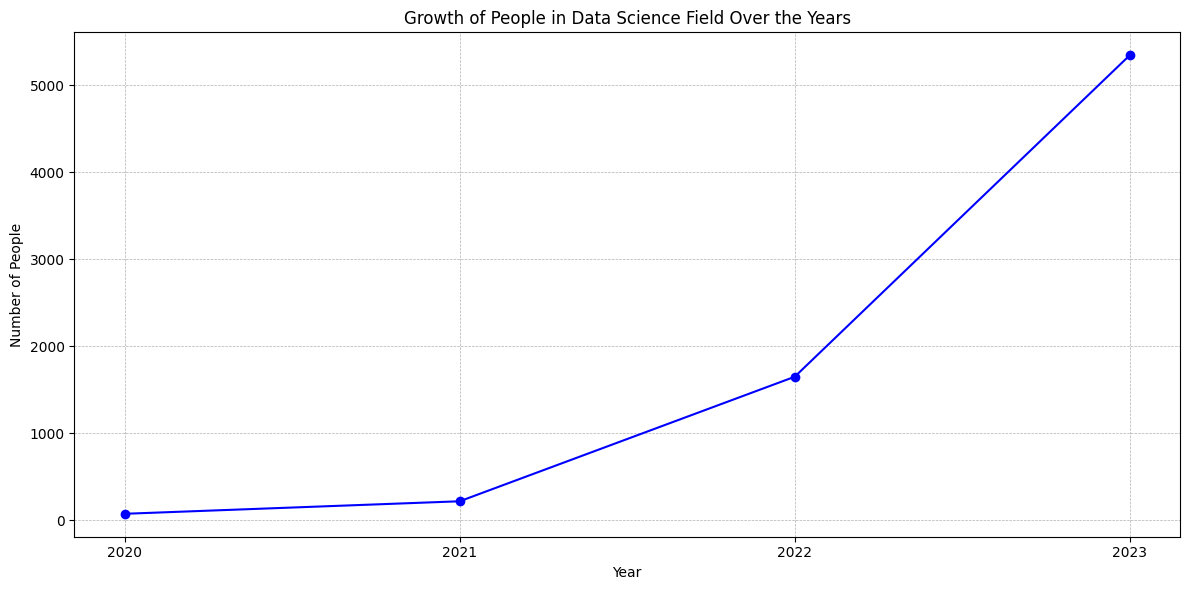

In [29]:
# Group the data by 'work_year' and count the number of entries for each year
ds_growth = df.groupby('work_year').size()

# Plot the counts over the years
plt.figure(figsize=(12, 6))
ds_growth.plot(kind='line', marker='o', color='blue')
plt.title('Growth of People in Data Science Field Over the Years')
plt.ylabel('Number of People')
plt.xlabel('Year')
# Set the x-axis tick locations and labels
plt.xticks([2020, 2021, 2022, 2023], ['2020', '2021', '2022', '2023'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The numbers indicate a significant growth in the data science field over the years.

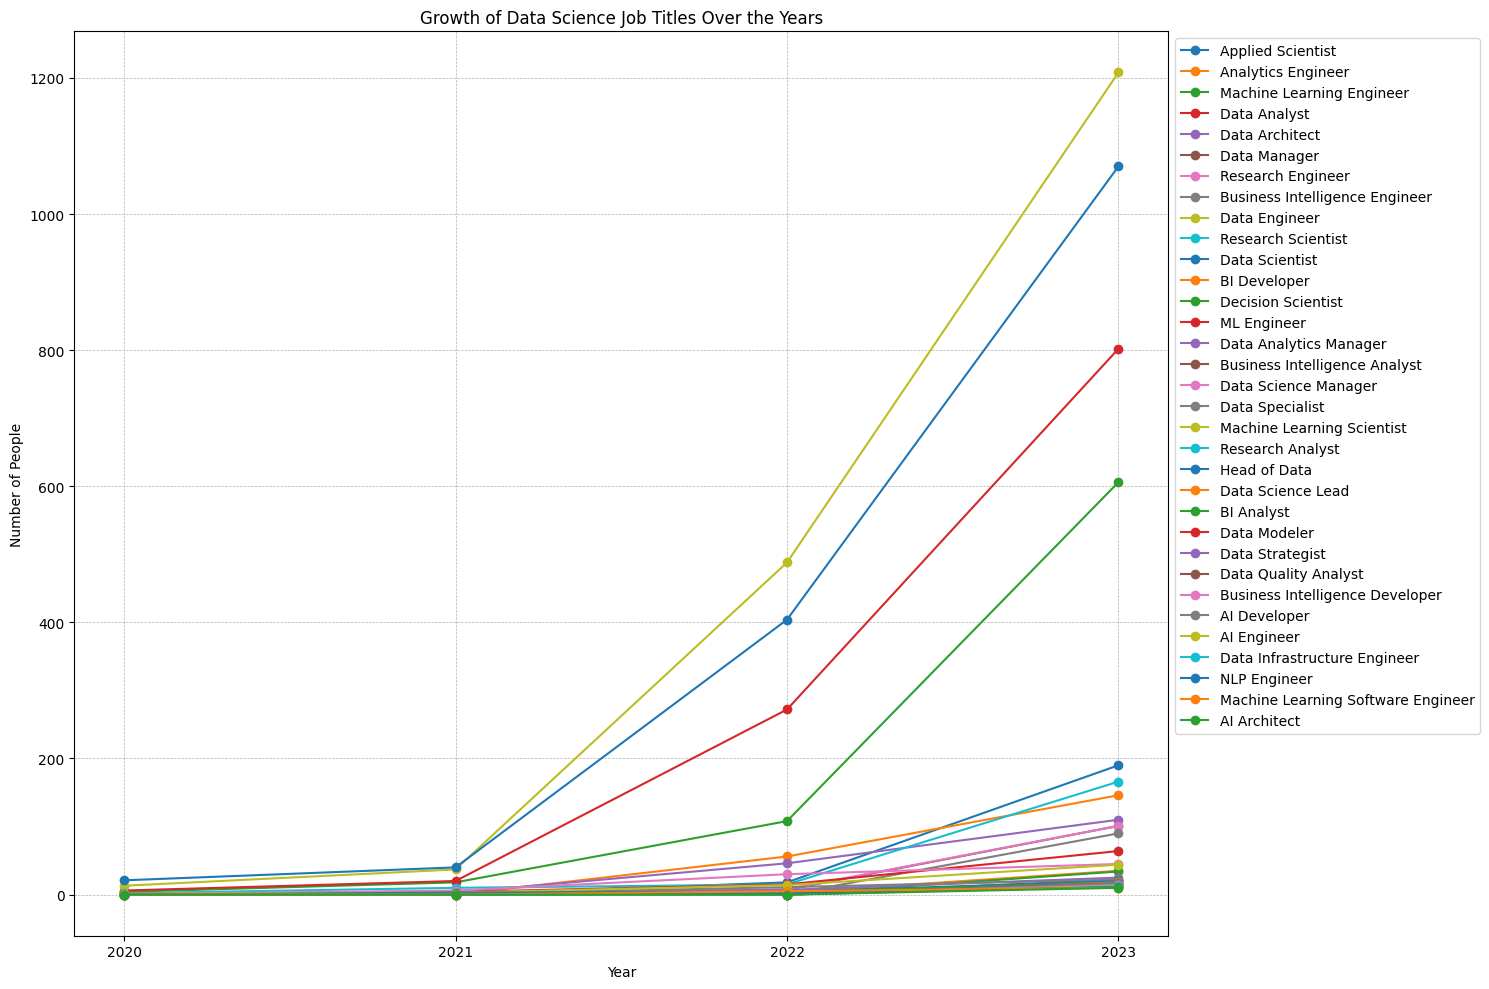

In [30]:
# Group by 'work_year' and 'job_title' and count the number of entries for each combination
job_title_growth = df.groupby(['work_year', 'job_title']).size().reset_index(name='count')

# Pivot the data to get years as columns and job titles as rows
pivot_data = job_title_growth.pivot(index='job_title', columns='work_year', values='count').fillna(0)

# Calculate growth rate from 2020 to 2023 for each job title
pivot_data['growth'] = (pivot_data[2023] - pivot_data[2020]) / (pivot_data[2020] + 1)  # +1 to avoid division by zero

# Filter pivot_data for job titles with a growth rate of at least 10
filtered_pivot_data = pivot_data[pivot_data['growth'] >= 10]
# Sort job titles by growth rate
sorted_titles = filtered_pivot_data.sort_values(by='growth', ascending=False).index

# Plot the growth for each job title over the years again, avoiding negative indexing
plt.figure(figsize=(15, 10))
for title in sorted_titles:
    plt.plot(filtered_pivot_data.columns[:-1], filtered_pivot_data.loc[title].iloc[:-1], marker='o', label=title)

plt.title('Growth of Data Science Job Titles Over the Years')
plt.ylabel('Number of People')
plt.xlabel('Year')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks([2020, 2021, 2022, 2023], ['2020', '2021', '2022', '2023'])

plt.tight_layout()
plt.show()



* The plot showcases the significant growth in specific roles within the data science field.
* Job titles that have shown considerable growth over the period are highlighted
* As evident, some job titles have seen significant growth, while others have remained relatively stable. 

In [31]:
# show all the job title increase over year
pivot_data

work_year,2020,2021,2022,2023,growth
job_title,,,,,
AI Architect,0.0,0.0,0.0,10.0,10.000000
AI Developer,0.0,0.0,1.0,13.0,13.000000
AI Engineer,0.0,0.0,0.0,13.0,13.000000
AI Programmer,0.0,0.0,1.0,4.0,4.000000
AI Research Engineer,0.0,0.0,0.0,4.0,4.000000
...,...,...,...,...,...
Sales Data Analyst,1.0,0.0,0.0,0.0,-0.500000
Software Data Engineer,0.0,0.0,0.0,3.0,3.000000
Staff Data Analyst,2.0,0.0,0.0,1.0,-0.333333


## Proportion of Experience Level by Company Size

In [32]:

# Distribution of company_size and experience_level
company_size_distribution = df['company_size'].value_counts(normalize=True) * 100
experience_level_distribution = df['experience_level'].value_counts(normalize=True) * 100

company_size_distribution, experience_level_distribution


(M    88.640417
 L     9.109617
 S     2.249966
 Name: company_size, dtype: float64,
 SE    71.751955
 MI    19.563726
 EN     5.597476
 EX     3.086843
 Name: experience_level, dtype: float64)

In [33]:
contingency_table = pd.crosstab(df['company_size'], df['experience_level'])
normalized_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

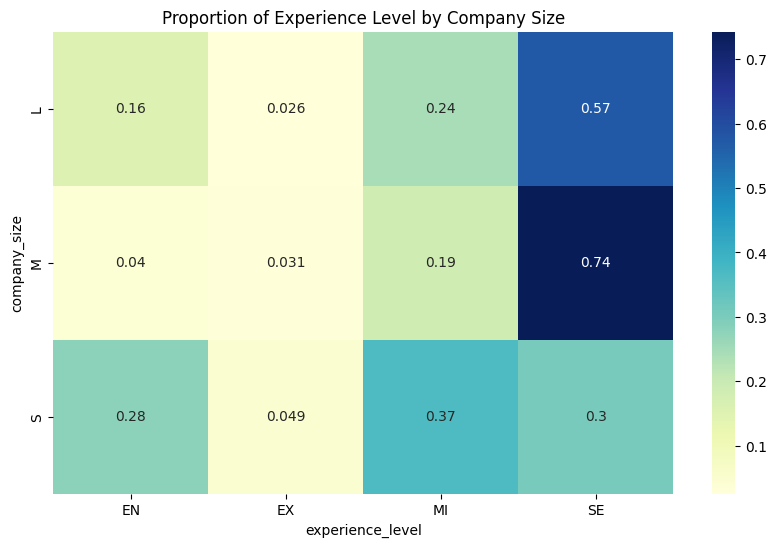

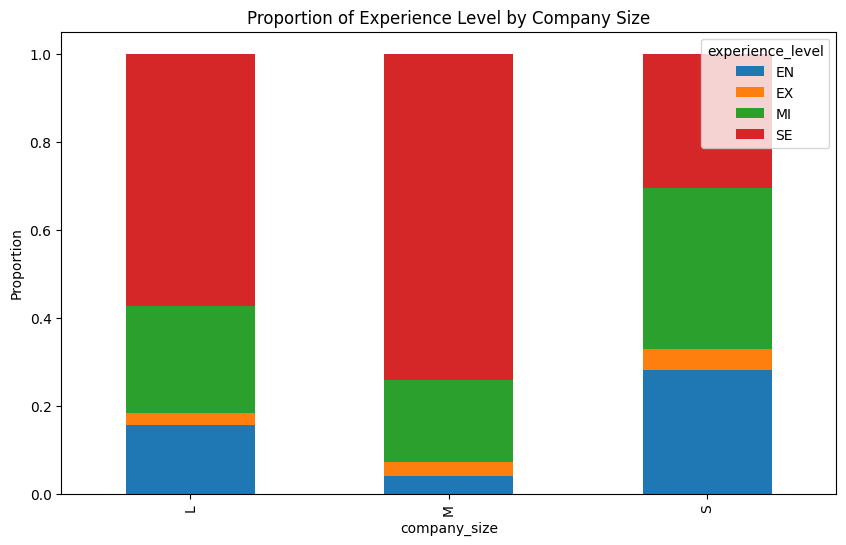

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_table, annot=True, cmap="YlGnBu")
plt.title("Proportion of Experience Level by Company Size")
plt.show()

# Using a stacked bar plot
normalized_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Proportion of Experience Level by Company Size")
plt.ylabel("Proportion")
plt.show()


Small Companies:

* Small companies have a significant proportion of employees in the "Entry Level" category. This suggests that smaller organizations are more inclined to hire individuals at the beginning of their careers, possibly due to budget constraints or the dynamic nature of startup roles that might be suitable for younger professionals.

Medium Companies:

* It's noteworthy that the "Senior" category is especially prominent in medium companies, suggesting that these organizations value experienced professionals to handle more specialized or leadership roles.

Large Companies:
* The largest companies display a more balanced distribution across experience levels. This indicates that these companies have diverse roles suitable for individuals at all stages of their careers. This can be attributed to the scale and complexity of operations in such organizations, necessitating a larger number of experienced professionals and managerial positions.

Entry-Level: Individuals starting their careers might find more opportunities in startups and smaller companies. These roles can offer hands-on experience and a steeper learning curve.

Experienced & Senior: Professionals with a significant amount of experience should target medium to large-sized companies, especially those with 201-1,000 employees, where their expertise might be in higher demand.

Managerial Roles: Those looking for managerial positions might find more opportunities in very large corporations, given the complexity and scale of operations that require effective management.

### If employee consider to relocate, where they will go?

In [35]:
# Create a new column 'relocated'
df['relocated'] = df['employee_residence'] != df['company_location']

# Calculate the proportion of employees who have been relocated
relocated_proportion = df['relocated'].value_counts(normalize=True) * 100

relocated_proportion


False    98.381122
True      1.618878
Name: relocated, dtype: float64

In [36]:
# Group by experience_level and calculate proportion of relocated employees
relocation_by_experience = df.groupby('experience_level')['relocated'].mean().sort_values(ascending=False)
print(relocation_by_experience)


experience_level
EN    0.093137
EX    0.026667
MI    0.026648
SE    0.006883
Name: relocated, dtype: float64


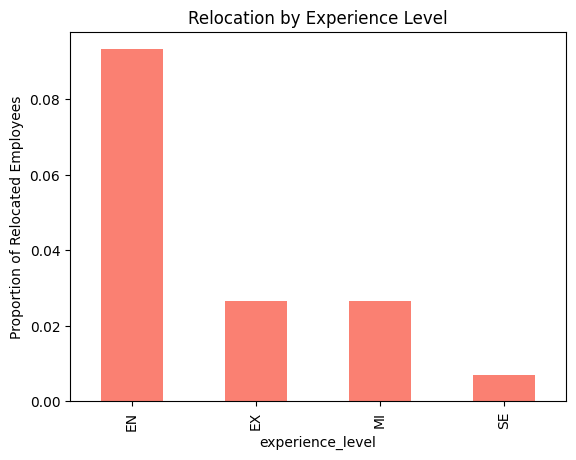

In [37]:
relocation_by_experience.plot(kind='bar', title="Relocation by Experience Level", color='salmon')
plt.ylabel('Proportion of Relocated Employees')
plt.show()

In [38]:
relocated_df = df[df['relocated'] == True]
city_counts = relocated_df['company_location'].value_counts()

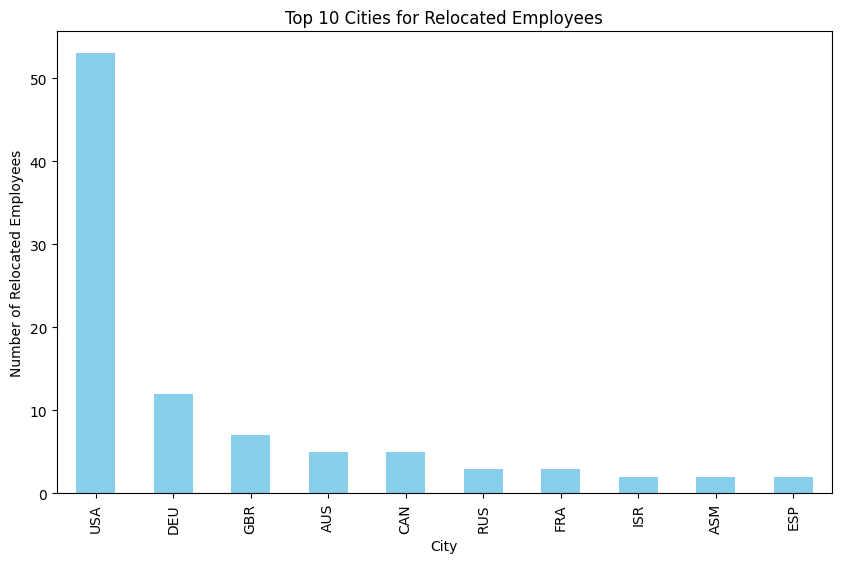

In [39]:
top_cities = city_counts.head(10)
top_cities.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Top 10 Cities for Relocated Employees")
plt.ylabel('Number of Relocated Employees')
plt.xlabel('City')
plt.show()

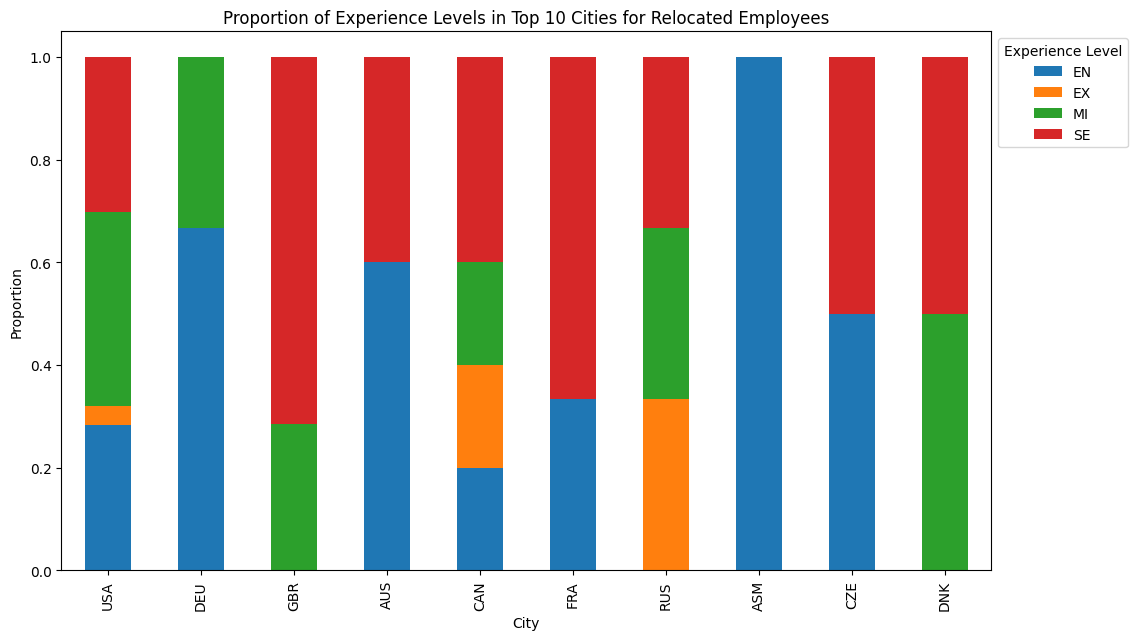

In [40]:
city_experience_counts = relocated_df.groupby(['company_location', 'experience_level']).size().unstack().fillna(0)
top_cities_list = city_experience_counts.sum(axis=1).nlargest(10).index
top_cities_data = city_experience_counts.loc[top_cities_list]
normalized_top_cities_data = top_cities_data.div(top_cities_data.sum(axis=1), axis=0)
normalized_top_cities_data.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("Proportion of Experience Levels in Top 10 Cities for Relocated Employees")
plt.ylabel('Proportion')
plt.xlabel('City')
plt.legend(title='Experience Level', loc='upper left', bbox_to_anchor=(1,1))
plt.show()


Analysis of the Visualization:

* The stacked bar plot showcases the distribution of experience levels within the top 10 cities with the most relocated employees.
* Each color in a bar represents a different experience level, and the height of the colored segment indicates the proportion of that experience level within the city.

Diverse Hiring:

* Several cities in the top 10, like the USA and CAN. display a balanced distribution across experience levels. This suggests that these cities have a wide range of job opportunities catering to individuals at all stages of their careers.

Preference for Experienced Professionals:

* Some cities, such as the GBR, CAN, ESP and FRA have a pronounced proportion of "Senior" roles. This indicates that these cities or the companies within them value seasoned professionals, possibly due to the nature of industries located there or the complexity of roles.

Entry-Level Opportunities:

* A few cities, like the DEU, AUS, ASM, and IND have a significant "Entry Level" segment. This could imply that businesses in these locations are expanding or that they have sectors like tech startups, which often hire fresh graduates.

Balanced Opportunities: Cities with a diverse spread across experience levels are ideal for job seekers regardless of their career stage. They offer a variety of roles suitable for both fresh graduates and experienced professionals.

Early Career: Those starting their careers should consider cities with a higher proportion of "Entry Level" roles, as they might find more opportunities tailored to their experience.

Mid to Senior Professionals: Individuals with significant experience should target cities with a more substantial "Mid-Level" and "Senior" segment, as their expertise might be in higher demand there.

Leadership Positions: Aspiring leaders and those looking for managerial roles should focus on cities with a pronounced "Executive-Level" segment.

# Conclusion 

### Achievements
As expected United Stats having the highest average salary in the world and the salary is increasing significantly in 2022 and 2023 show that the on demand trend on data science field. The most frequent job title in the data science field is Data Engineer, Data Scientist and Data Analyst. However the unexpected will be the mid size company has the highest average salary in the world.

### Limitations
The dataset is not large enough to represent the whole data science job market. The data is only collected from the Kaggle platform and the data is only collected from the year 2020 to 2023. The data is not collected from other platform such as LinkedIn and Glassdoor. As well with the accuracy of the dataset is not guaranteed.

### Future Work
In the future, it might be able to combine with other datasets for exmaple from the recuiter company to follow up the latest trend of data science job market and as well will the the salaries dataset provided from companies instead of employee self uploaded.